<a href="https://colab.research.google.com/github/nike-2001/ML-Workshop/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""This is a Data Cleaning Execise"""
import pandas as pd
# Create Dataframe of a table from csv file
df = pd.read_csv("76_attributes_heartdiseases.csv",\
                 na_values=["-9",-9,-18,81])
print(df.columns) # Print column names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76'],
      dtype='object')


In [ ]:
# From data description,
# V58 is decision variable
#  columns after V58 are part of decision or un-used columns
df = df.iloc[:,:58] # so keep only first 58 columnd and remove rest of them
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58'],
      dtype='object')

In [ ]:
# Tune the decision variable for Binary classification 
#(Heart Disease (1) or No Heart Disease (0))
df.loc[df['V58'] > 0, 'V58'] = 1

In [ ]:
# Print sample records for viewing
df.head() #NaN - Not a Number are missing values in original data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
0,1.0,0,63,1,NaN,NaN,NaN,NaN,1,145,...,NaN,NaN,6.0,NaN,NaN,NaN,2,16.0,NaN,0
1,2.0,0,67,1,NaN,NaN,NaN,NaN,4,160,...,NaN,NaN,3.0,NaN,NaN,NaN,2,5.0,NaN,1
2,3.0,0,67,1,NaN,NaN,NaN,NaN,4,120,...,NaN,NaN,7.0,NaN,NaN,NaN,2,20.0,NaN,1
3,4.0,0,37,1,NaN,NaN,NaN,NaN,3,130,...,NaN,NaN,3.0,NaN,NaN,NaN,2,4.0,NaN,0
4,6.0,0,41,0,NaN,NaN,NaN,NaN,2,130,...,NaN,NaN,3.0,NaN,NaN,NaN,2,18.0,NaN,0


In [ ]:
df.dtypes # Data types of each column

V1     float64
V2       int64
V3       int64
V4       int64
V5     float64
V6     float64
V7     float64
V8     float64
V9       int64
V10      int64
V11      int64
V12    float64
V13    float64
V14    float64
V15    float64
V16    float64
V17    float64
V18      int64
V19      int64
V20      int64
V21    float64
V22    float64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28    float64
V29    float64
V30    float64
V31    float64
V32      int64
V33    float64
V34      int64
V35      int64
V36      int64
V37      int64
V38      int64
V39    float64
V40    float64
V41    float64
V42    float64
V43      int64
V44    float64
V45    float64
V46    float64
V47    float64
V48    float64
V49    float64
V50    float64
V51    float64
V52    float64
V53    float64
V54    float64
V55      int64
V56    float64
V57    float64
V58      int64
dtype: object

In [ ]:
# Drop columns which are having strings or objects
df = df.select_dtypes(exclude=['object'])

In [ ]:
# Print columns which have all NaN values
print("Columns with all null values are")
print(df.columns[df.isnull().all()])
print(df['V5'].describe())
# Drop columns which have all NaN values
l=df.columns[df.isnull().all()]
df.drop(l, inplace=True, axis=1)

Columns with all null values are
Index(['V5', 'V6', 'V7', 'V45', 'V46', 'V47', 'V48', 'V49', 'V52', 'V53'], dtype='object')
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: V5, dtype: float64


In [ ]:
df.shape

(282, 48)

In [ ]:
# Find rows with missing values greater than 50%
print(df.isnull())
print(df.isnull().sum(axis=1))
df[df.isnull().sum(axis=1)>(df.shape[1]/2)]
df = df[df.isnull().sum(axis=1)\
        <=(df.shape[1]/2)]

        V1     V2     V3     V4    V8     V9    V10    V11    V12   V13  ...  \
0    False  False  False  False  True  False  False  False  False  True  ...   
1    False  False  False  False  True  False  False  False  False  True  ...   
2    False  False  False  False  True  False  False  False  False  True  ...   
3    False  False  False  False  True  False  False  False  False  True  ...   
4    False  False  False  False  True  False  False  False  False  True  ...   
5    False  False  False  False  True  False  False  False  False  True  ...   
6    False  False  False  False  True  False  False  False  False  True  ...   
7    False  False  False  False  True  False  False  False  False  True  ...   
8    False  False  False  False  True  False  False  False  False  True  ...   
9    False  False  False  False  True  False  False  False  False  True  ...   
10   False  False  False  False  True  False  False  False  False  True  ...   
11   False  False  False  False  True  F

In [ ]:
# Print colmuns that have minimum one NaN value
df.columns[df.isna().any()]
# df.isna().any()

Index(['V1', 'V8', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V30', 'V33', 'V41', 'V42', 'V44',
       'V50', 'V51', 'V54', 'V56', 'V57'],
      dtype='object')

In [ ]:
# Fill missing values with mode value for all columns which are float or int
for col in df.columns[df.isnull().any()]:
    df[col].fillna(df[col].mode()[0],\
                   inplace=True)
# Print remaining columns which still have NaN values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
# Remove columns which have same value in all rows
df=df.loc[:, (df != df.iloc[0]).any()]
df.shape

(282, 46)

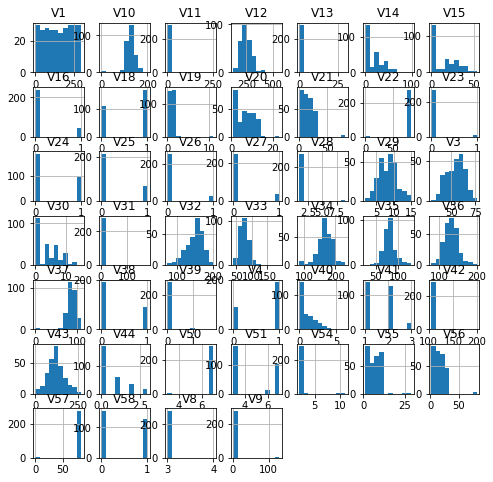

In [ ]:
# Plot histogram of each column separately
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

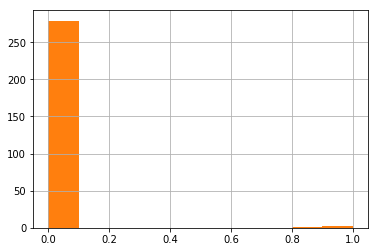

In [ ]:
df['V9'].hist()
df.V9.hist()

In [ ]:
df.describe(include= 'all') 
# Get statistical description of each column in data frame

,V1,V3,V4,V8,V9,V10,V11,V12,V13,V14,...,V42,V43,V44,V50,V51,V54,V55,V56,V57,V58
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,151.234043,54.411348,0.677305,3.003546,4.432624,130.269504,2.822695,249.046099,0.177305,16.656028,...,105.819149,121.290780,0.645390,6.985816,4.624113,2.063830,6.570922,15.815603,81.379433,0.453901
std,87.491139,9.053083,0.468338,0.059549,12.365608,22.218225,21.932859,51.011212,2.143545,19.441090,...,8.026153,48.558442,0.925208,0.238197,1.929501,0.717972,4.124867,10.406406,9.773667,0.498755
min,1.000000,29.000000,0.000000,3.000000,1.000000,1.000000,0.000000,126.000000,0.000000,0.000000,...,105.000000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,74.250000,48.000000,0.000000,3.000000,3.000000,120.000000,0.000000,212.000000,0.000000,0.000000,...,105.000000,90.250000,0.000000,7.000000,3.000000,2.000000,3.000000,8.000000,82.000000,0.000000
50%,151.500000,55.000000,1.000000,3.000000,3.000000,130.000000,1.000000,244.000000,0.000000,10.000000,...,105.000000,117.500000,0.000000,7.000000,3.000000,2.000000,7.000000,15.000000,82.000000,0.000000
75%,227.750000,61.000000,1.000000,3.000000,4.000000,140.000000,1.000000,277.000000,0.000000,30.000000,...,105.000000,150.000000,1.000000,7.000000,7.000000,2.000000,10.000000,22.000000,83.000000,1.000000
max,298.000000,77.000000,1.000000,4.000000,130.000000,200.000000,253.000000,564.000000,30.000000,99.000000,...,200.000000,270.000000,3.000000,7.000000,7.000000,11.000000,29.000000,82.000000,84.000000,1.000000


In [ ]:
# Normalize the data
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [ ]:
df.describe(include= 'all')

,V1,V3,V4,V8,V9,V10,V11,V12,V13,V14,...,V42,V43,V44,V50,V51,V54,V55,V56,V57,V58
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,0.505839,0.529403,0.677305,0.003546,0.026609,0.649595,0.011157,0.280927,0.005910,0.168243,...,0.008623,0.449225,0.215130,0.996454,0.406028,0.007092,0.198961,0.182909,0.968803,0.453901
std,0.294583,0.188606,0.468338,0.059549,0.095857,0.111649,0.086691,0.116464,0.071452,0.196375,...,0.084486,0.179846,0.308403,0.059549,0.482375,0.079775,0.147317,0.128474,0.116353,0.498755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246633,0.395833,0.000000,0.000000,0.015504,0.597990,0.000000,0.196347,0.000000,0.000000,...,0.000000,0.334259,0.000000,1.000000,0.000000,0.000000,0.071429,0.086420,0.976190,0.000000
50%,0.506734,0.541667,1.000000,0.000000,0.015504,0.648241,0.003953,0.269406,0.000000,0.101010,...,0.000000,0.435185,0.000000,1.000000,0.000000,0.000000,0.214286,0.172840,0.976190,0.000000
75%,0.763468,0.666667,1.000000,0.000000,0.023256,0.698492,0.003953,0.344749,0.000000,0.303030,...,0.000000,0.555556,0.333333,1.000000,1.000000,0.000000,0.321429,0.259259,0.988095,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Save the new cleaned data
df.to_csv("cleaned_76hd.csv",index=False)

In [ ]:
# Min max normalization Formula  (element - min) / (max - min)
l=[12,24,10,2]
n_l=[]
for e in l:
    n_l.append((e-min(l))/(max(l)-min(l)))
print(n_l)

[0.45454545454545453, 1.0, 0.36363636363636365, 0.0]
